In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
milk = pd.read_csv('milk.csv', index_col= 0)

In [3]:
scaler = StandardScaler()

In [4]:
milkscaled = scaler.fit_transform(milk)

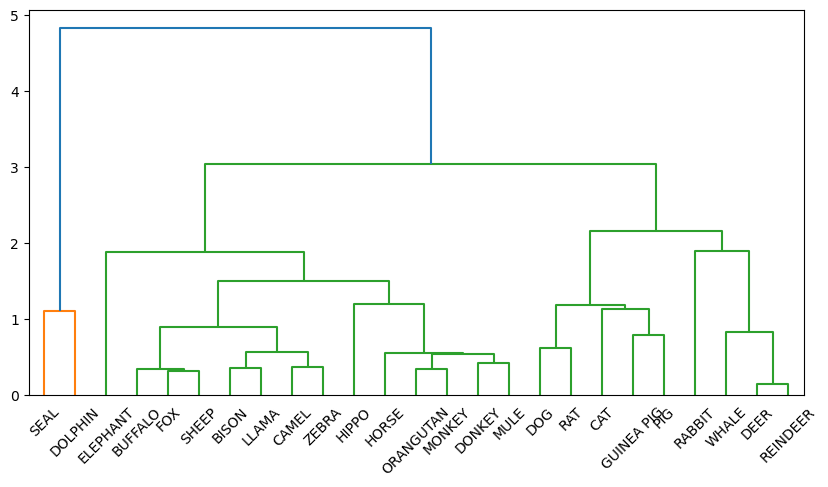

In [5]:
merging = linkage(milkscaled, method='centroid')
plt.figure(figsize=(10,5))
dendrogram(merging, labels= list(milk.index), leaf_rotation= 45, leaf_font_size= 10)
plt.show()

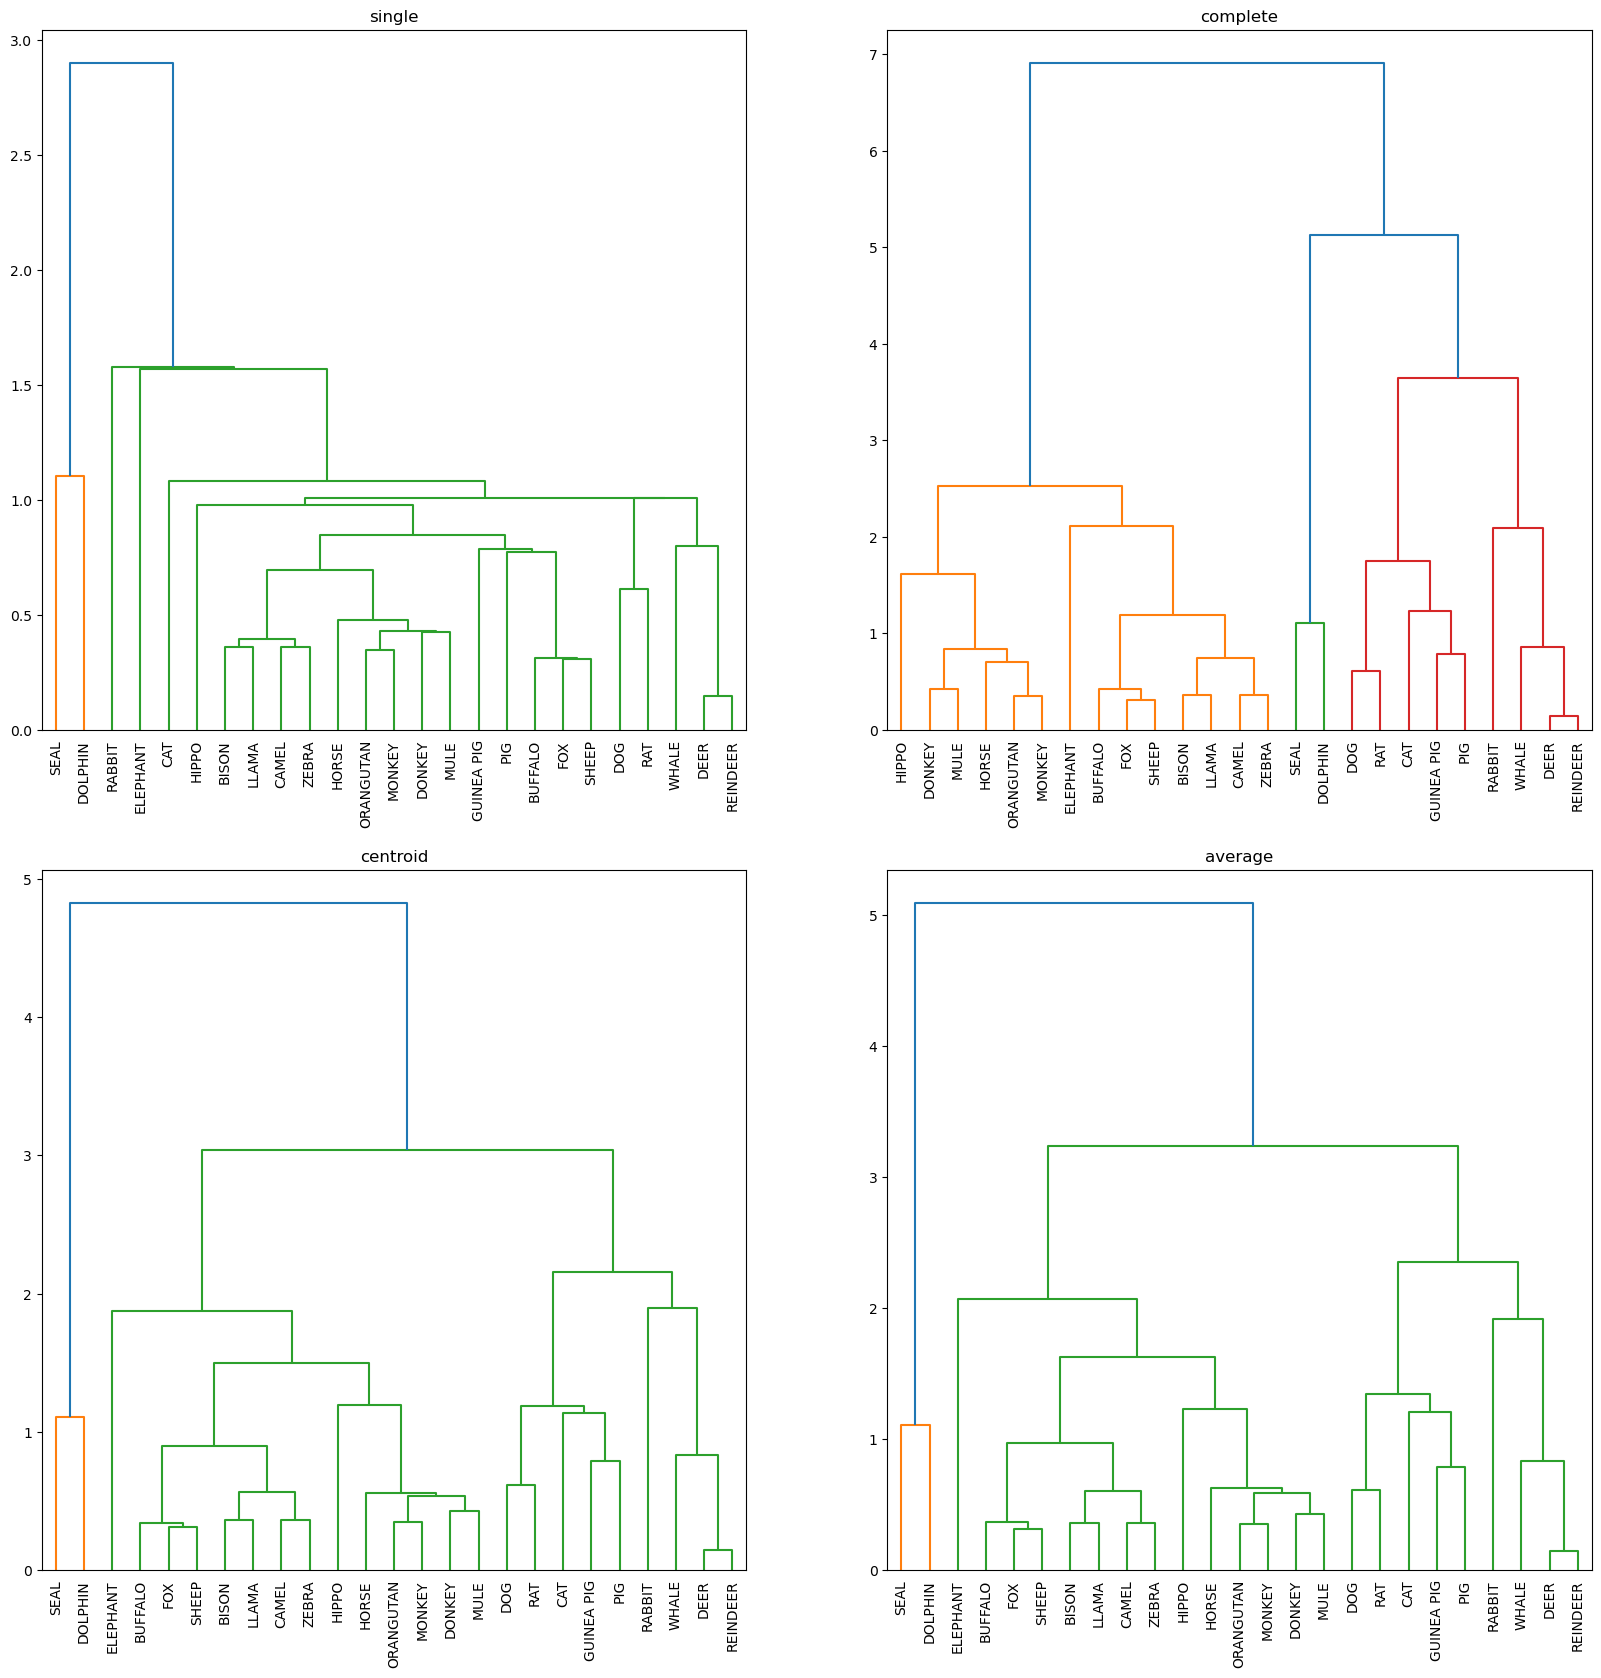

In [11]:
plt.figure(figsize=(20,20))
for v, i in enumerate(['single', 'complete', 'centroid', 'average'],1):
    merging = linkage(milkscaled, method = i)
    plt.subplot(int('22'+str(v)))
    plt.title(i)
    dendrogram(merging, labels= list(milk.index), leaf_rotation= 90, leaf_font_size= 10)
plt.show()

In [12]:
# silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
clustering = AgglomerativeClustering(n_clusters=2, linkage='average')
pipe = Pipeline([('SCL',scaler),('CLUST',clustering)])
pipe.fit(milk)
print(clustering.labels_)
print(silhouette_score(milkscaled,clustering.labels_))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
0.5186847578981009


In [13]:
nutr = pd.read_csv('nutrient.csv', index_col= 0)
nutr

,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6
BEEF CANNED,180,22,10,17,3.7
CHICKEN BROILED,115,20,3,8,1.4
CHICKEN CANNED,170,25,7,12,1.5
BEEF HEART,160,26,5,14,5.9
LAMB LEG ROAST,265,20,20,9,2.6


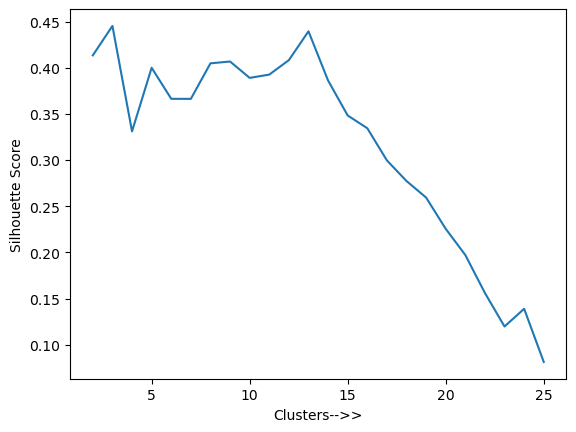

[0.41345065968561695, 0.44531853755129397, 0.3311159158397946, 0.4000030856637424, 0.36637668089351516, 0.3663099680081157, 0.4047937767281752, 0.40677165602435245, 0.38904978180582817, 0.3925897264817831, 0.408269541623534, 0.439462095831011, 0.38617611908057325, 0.3483364758476511, 0.33450144037439855, 0.29969084822726005, 0.27734227540642326, 0.25943671252054146, 0.22557189329004498, 0.19720579871771143, 0.15608716825289143, 0.11976607504552475, 0.13896582346773095, 0.08140984855685672]


In [14]:
list1 = []
for i in range(2,26):
    clustering = AgglomerativeClustering(n_clusters=i, linkage='average')
    pipe = Pipeline([('SCL',scaler),('CLUST',clustering)])
    pipe.fit(nutr)
    list1.append(silhouette_score(StandardScaler().fit_transform(nutr),clustering.labels_))
plt.plot( range(2,26),list1)
plt.xlabel('Clusters-->>')
plt.ylabel('Silhouette Score')
plt.show()
print(list1)

In [15]:
arrest = pd.read_csv('USArrests.csv', index_col= 0)
arrest

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


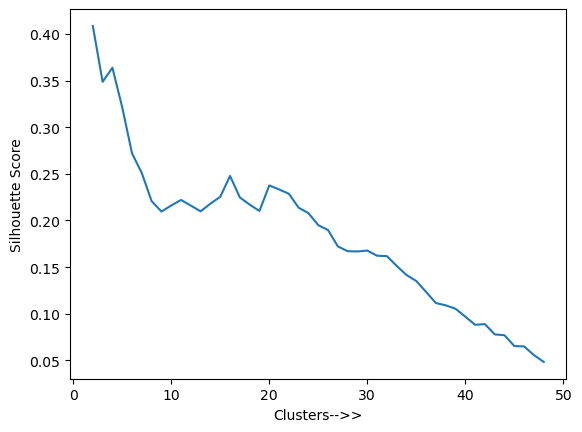

[0.4084890326217641, 0.34863679190476177, 0.3636819420151221, 0.3212682619092323, 0.2719787783719339, 0.2507421522912214, 0.22076298935497146, 0.20960529040521791, 0.21610607482843197, 0.22198697964332864, 0.21598740705377392, 0.20983254217054292, 0.21807832433210492, 0.2253608906099035, 0.2477170749185789, 0.22468766238118726, 0.21702971321136377, 0.21017213083616976, 0.23757972588692464, 0.23328094288431753, 0.22865638621556061, 0.21368082400886795, 0.2078483357951345, 0.19501408274192794, 0.18969446575055168, 0.17223600146289983, 0.16710247688327357, 0.16682668792172303, 0.16775078007915784, 0.16225738744582713, 0.1618046885448858, 0.15132522430670642, 0.14162719025588388, 0.13515246372757908, 0.1234699119111712, 0.11150475043228787, 0.10911153819063449, 0.1054556529358523, 0.09695862006185357, 0.08827226096825067, 0.08897985344039393, 0.07798437225367694, 0.0770367016189864, 0.06546806324408244, 0.06502546728043575, 0.05579679753245207, 0.04846213237344418]


In [16]:
list1 = []
for i in range(2,49):
    clustering = AgglomerativeClustering(n_clusters=i, linkage='average')
    pipe = Pipeline([('SCL',scaler),('CLUST',clustering)])
    pipe.fit(arrest)
    list1.append(silhouette_score(StandardScaler().fit_transform(arrest),clustering.labels_))
plt.plot( range(2,49),list1)
plt.xlabel('Clusters-->>')
plt.ylabel('Silhouette Score')
plt.show()
print(list1)

In [17]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

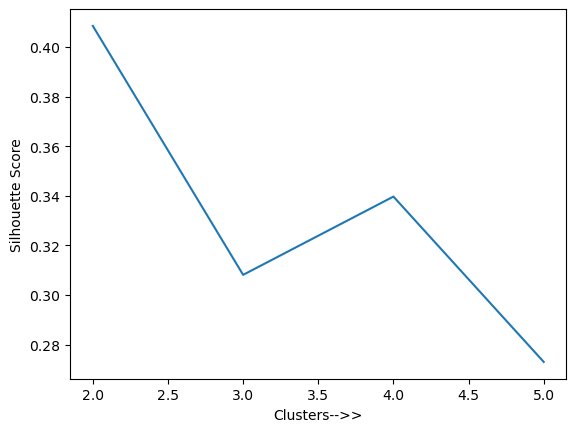

[0.4084890326217641, 0.30813622648945616, 0.33968891433344395, 0.27303268923563334]


In [18]:
data = pd.read_csv('USArrests.csv', index_col= 0)
list1 = []
for i in range(2,6):
    clustering = KMeans(n_clusters=i, random_state= 23)
    pipe = Pipeline([('SCL',scaler),('CLUST',clustering)])
    pipe.fit(data)
    list1.append(silhouette_score(StandardScaler().fit_transform(data),clustering.labels_))
plt.plot( range(2,6),list1)
plt.xlabel('Clusters-->>')
plt.ylabel('Silhouette Score')
plt.show()
print(list1)

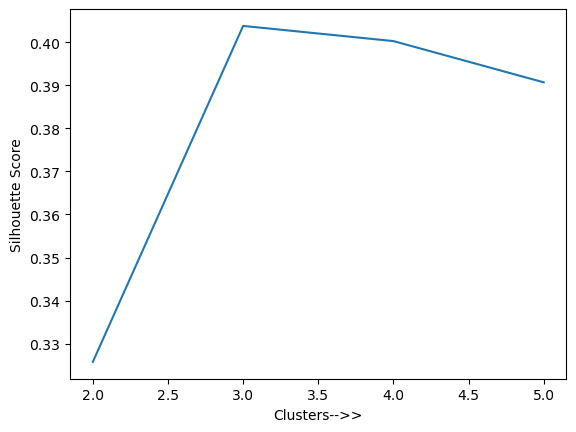

[0.32577846240602615, 0.4037719788150674, 0.4002506914299662, 0.3906769598972201]


In [19]:
data = pd.read_csv('nutrient.csv', index_col= 0)
list1 = []
for i in range(2,6):
    clustering = KMeans(n_clusters=i, random_state= 23)
    pipe = Pipeline([('SCL',scaler),('CLUST',clustering)])
    pipe.fit(data)
    list1.append(silhouette_score(StandardScaler().fit_transform(data),clustering.labels_))
plt.plot( range(2,6),list1)
plt.xlabel('Clusters-->>')
plt.ylabel('Silhouette Score')
plt.show()
print(list1)

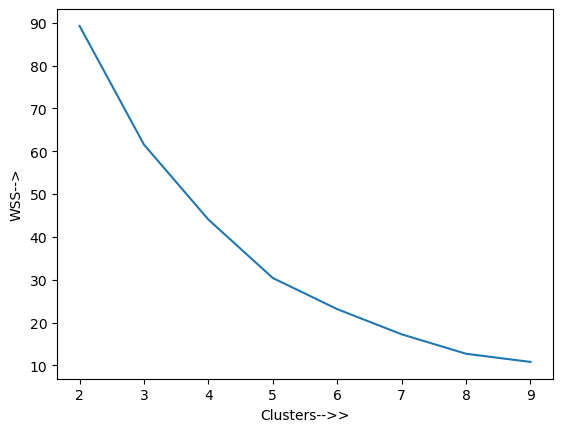

[89.2443677000896, 61.53871293694049, 44.046151102281016, 30.4066622047884, 23.13888202982235, 17.265934989286922, 12.722173804423273, 10.820231067445686]


In [20]:
data = pd.read_csv('nutrient.csv', index_col= 0)
list1 = []
for i in range(2,10):
    clustering = KMeans(n_clusters=i, random_state= 23)
    pipe = Pipeline([('SCL',scaler),('CLUST',clustering)])
    pipe.fit(data)
    list1.append(clustering.inertia_)
plt.plot( range(2,10),list1)
plt.xlabel('Clusters-->>')
plt.ylabel('WSS-->')
plt.show()
print(list1)

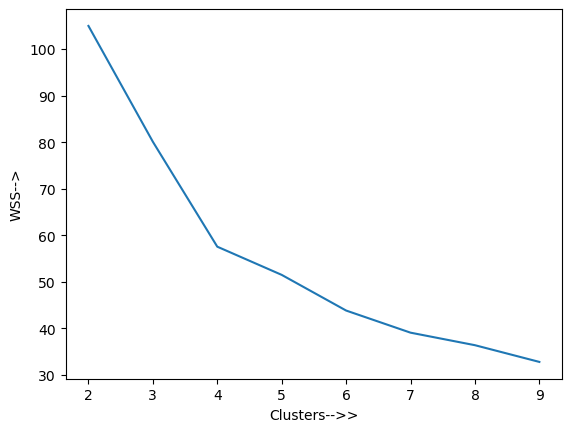

[104.96163315756871, 80.08569526137275, 57.55425863091104, 51.49992859726626, 43.840668803979135, 39.08918959849747, 36.39862955934078, 32.80656936789677]


In [21]:
data = pd.read_csv('USArrests.csv', index_col= 0)
list1 = []
for i in range(2,10):
    clustering = KMeans(n_clusters=i, random_state= 23)
    pipe = Pipeline([('SCL',scaler),('CLUST',clustering)])
    pipe.fit(data)
    list1.append(clustering.inertia_)
plt.plot( range(2,10),list1)
plt.xlabel('Clusters-->>')
plt.ylabel('WSS-->')
plt.show()
print(list1)

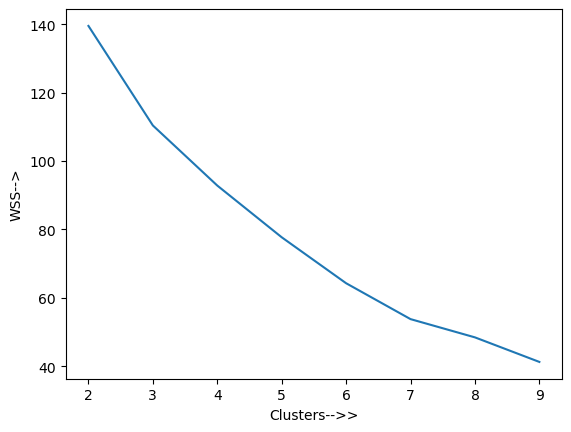

[139.5073704483181, 110.40242709032155, 92.82844636149161, 77.70858605396458, 64.26912289585492, 53.77499973088706, 48.437252516131764, 41.25861354124386]


In [36]:
data = pd.read_csv('Protein.csv', index_col= 0)
list1 = []
for i in range(2,10):
    clustering = KMeans(n_clusters=i, random_state= 23)
    pipe = Pipeline([('SCL',scaler),('CLUST',clustering)])
    pipe.fit(data)
    list1.append(clustering.inertia_)
plt.plot( range(2,10),list1)
plt.xlabel('Clusters-->>')
plt.ylabel('WSS-->')
plt.show()
print(list1)

In [53]:
from sklearn.decomposition import PCA
clustering.labels_

array([2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0, 2, 0, 1, 1, 1,
       2, 1, 2], dtype=int32)

In [62]:
data = pd.read_csv('Protein.csv', index_col= 0)
clustering = KMeans(n_clusters=3, random_state= 23)
pipe = Pipeline([('SCL',scaler),('CLUST',clustering)])
pipe.fit(data)

Pipeline(steps=[('SCL', StandardScaler()),
                ('CLUST', KMeans(n_clusters=3, random_state=23))])

In [66]:
pca = PCA(n_components= 2)
df = pca.fit_transform(StandardScaler().fit_transform(data))
df_data = pd.concat([pd.DataFrame(df, columns=['PCA1', 'PCA2']),
                     pd.DataFrame(clustering.labels_,columns= ['cluster'])], axis=1)

In [67]:
import seaborn as sns

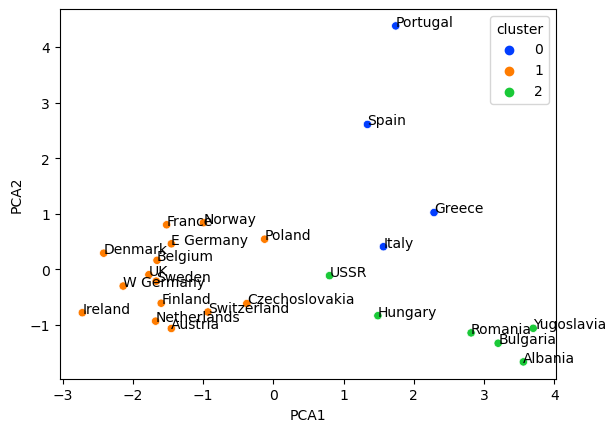

In [69]:
sns.scatterplot(data = df_data, x = 'PCA1', y = 'PCA2', hue='cluster',palette='bright')
for i in range(0, df_data.shape[0]):
    plt.text(df[i,0], df[i,1],list(data.index)[i])

In [72]:
pca.get_feature_names_out()

array(['pca0', 'pca1'], dtype=object)

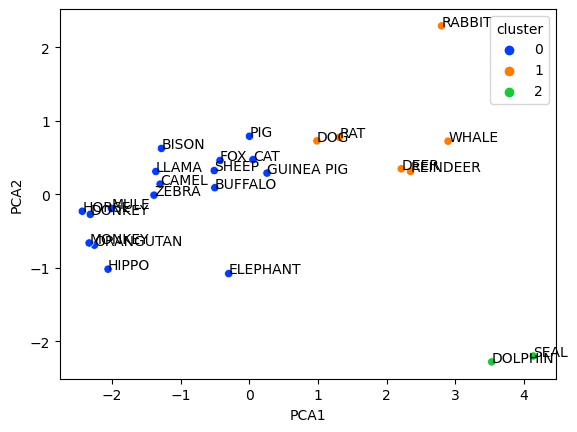

In [78]:
data = pd.read_csv('milk.csv', index_col= 0)
clustering = KMeans(n_clusters=3, random_state= 23)
pipe = Pipeline([('SCL',scaler),('CLUST',clustering)])
pipe.fit(data)
pca = PCA(n_components= 2)
pca_array = pca.fit_transform(StandardScaler().fit_transform(data))
pca_data = pd.concat([pd.DataFrame(df, columns=['PCA1', 'PCA2']),
                     pd.DataFrame(clustering.labels_,columns= ['cluster'])], axis=1)
sns.scatterplot(data = pca_data, x = 'PCA1', y = 'PCA2', hue='cluster',palette='bright')
for i in range(0, df_data.shape[0]):
    plt.text(pca_array[i,0], pca_array[i,1],list(data.index)[i])
    
    